In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim



In [28]:
torch.manual_seed(42)
mean = torch.tensor([0.0, 0.0])
cov = torch.tensor([[1.0, 0], [0, 1.0]])

n_samples = 50
data = torch.distributions.MultivariateNormal(mean, cov).sample((n_samples,))

c = 1.5

# Generating noise
noise_mean = torch.tensor([0.0, 0.0])
noise_cov = torch.tensor([[0.1, 0.0], [0.0, 0.1]])
noise = torch.distributions.MultivariateNormal(noise_mean, noise_cov).sample((n_samples,))

# Adding noise
labels = (data[:, 0]**2 + data[:, 1]**2 > c).float().view(-1, 1)  # Ensure labels are float and shape (N, 1)
#data = data  + noise


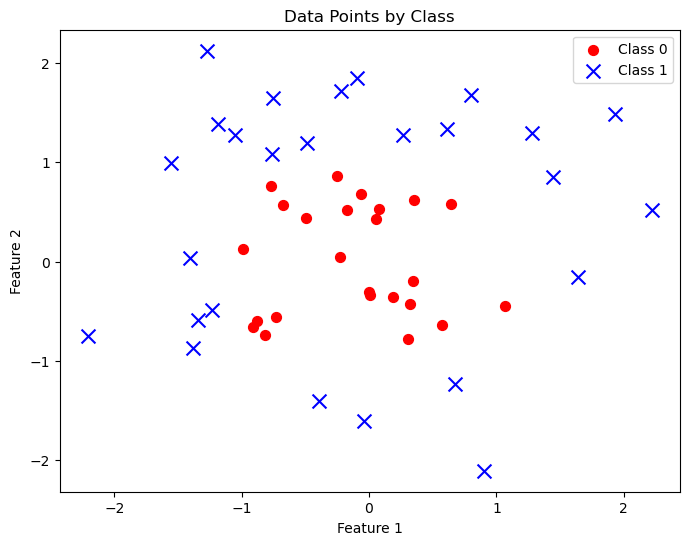

In [29]:

data_np = data.numpy()
labels_np = labels.numpy().flatten()  # Flatten to shape (N,)

plt.figure(figsize=(8, 6))

# Plot class 0
plt.scatter(data_np[labels_np == 0][:, 0], data_np[labels_np == 0][:, 1], color='red', label='Class 0', s=50, marker='o')

# Plot class 1
plt.scatter(data_np[labels_np == 1][:, 0], data_np[labels_np == 1][:, 1], color='blue', label='Class 1', s=100, marker='x')

plt.title('Data Points by Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [48]:
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(2, 4)  # Increased size for better learning capacity
        self.layer2 = nn.Linear(4, 2)
        # self.layer3 = nn.Linear(4, 2)
        # self.layer4 = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)  # Final output layer
    
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # x = torch.relu(self.layer3(x))
        # x = torch.relu(self.layer4(x))
        x = torch.sigmoid(self.output(x))  # Apply sigmoid for binary classification
        return x


model = SimpleNN()
criterion = nn.BCELoss()  # Use BCELoss for sigmoid output
optimizer = optim.Adam(model.parameters(), lr=0.01)


n_epochs = 200

for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(data)
    loss = criterion(outputs, labels)  # Compute loss
    
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')


Epoch [10/200], Loss: 0.7058
Epoch [20/200], Loss: 0.6924
Epoch [30/200], Loss: 0.6724
Epoch [40/200], Loss: 0.6371
Epoch [50/200], Loss: 0.5848
Epoch [60/200], Loss: 0.5231
Epoch [70/200], Loss: 0.4421
Epoch [80/200], Loss: 0.3303
Epoch [90/200], Loss: 0.2319
Epoch [100/200], Loss: 0.1732
Epoch [110/200], Loss: 0.1281
Epoch [120/200], Loss: 0.0967
Epoch [130/200], Loss: 0.0756
Epoch [140/200], Loss: 0.0606
Epoch [150/200], Loss: 0.0496
Epoch [160/200], Loss: 0.0414
Epoch [170/200], Loss: 0.0350
Epoch [180/200], Loss: 0.0300
Epoch [190/200], Loss: 0.0260
Epoch [200/200], Loss: 0.0228


In [49]:

predictions = (outputs > 0.5).float()

# Compare predictions with true labels
correct_predictions = (predictions == labels).float()
total_correct = correct_predictions.sum().item()

print(f'Total number of correct predictions: {total_correct}')

Total number of correct predictions: 50.0


In [6]:
print((labels == 1).sum())

tensor(92)


In [50]:
activation = {}

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

# Register hooks
model.layer1.register_forward_hook(get_activation('layer1'))
model.layer2.register_forward_hook(get_activation('layer2'))
model.output.register_forward_hook(get_activation('output'))

# Forward pass with example data
#data = torch.tensor([[1.0, 2.0], [3.0, 4.0]], dtype=torch.float32)
output = model(data)

# Print the stored activations


In [23]:
# for name, output in activation.items():
#     print(f'{name} output: {output}')

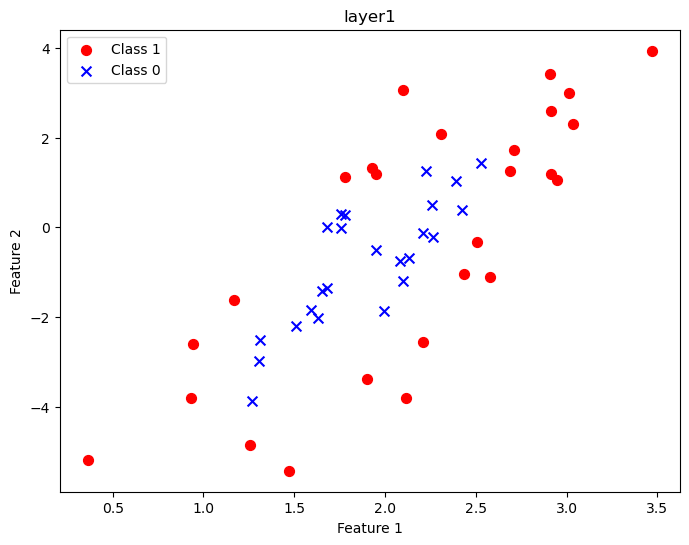

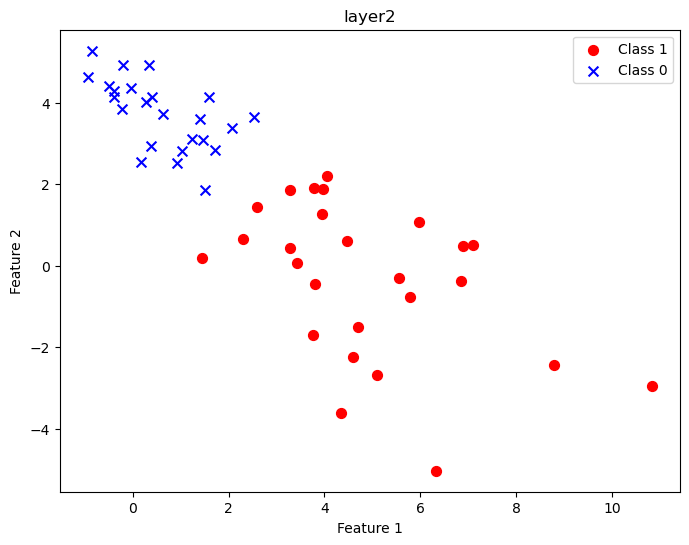

In [51]:
i=0
for name, output in activation.items():
    if (i>1):
        break
    plt.figure(figsize=(8, 6))

    # Flatten the mask to make it one-dimensional
    mask = (labels == 1).squeeze()

    # Plot class 0 (red points for class 1)
    plt.scatter(output[mask, 0], output[mask, 1], color='red', label='Class 1', s=50, marker='o')
    plt.scatter(output[~mask, 0], output[~mask, 1], color='blue', label='Class 0', s=50, marker='x')

    plt.title(f'{name}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    i+=1

